In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Wave7.csv')
data.head()

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
data.columns

Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=613)

In [4]:
data.shape

(97220, 613)

In [5]:
# countries = data[(data['B_COUNTRY_ALPHA'] == 'IND') | (data['B_COUNTRY_ALPHA'] == 'USA') | (data['B_COUNTRY_ALPHA'] == 'DEU')]

data[(data['B_COUNTRY_ALPHA'] == 'USA')].shape

(2596, 613)

In [6]:
countries = data[(data['B_COUNTRY_ALPHA'] == 'USA')]
countries.reset_index(drop = True, inplace = True)

cat_cols = list(set(countries.columns)-{'Y001','Y002','Y003','SACSECVAL', 'RESEMAVAL','I_AUTHORITY',  'I_NATIONALISM',  'I_DEVOUT',  'DEFIANCE',  'I_RELIGIMP',  'I_RELIGBEL',  'I_RELIGPRAC',  'DISBELIEF',  'I_NORM1',  'I_NORM2',  'I_NORM3',  'RELATIVISM',  'I_TRUSTARMY',  'I_TRUSTPOLICE',  'I_TRUSTCOURTS',  'SCEPTICISM',  'I_INDEP',  'I_IMAGIN',  'I_NONOBED',  'AUTONOMY',  'I_WOMJOB',  'I_WOMPOL',  'I_WOMEDU',  'EQUALITY',  'I_HOMOLIB',  'I_ABORTLIB',  'I_DIVORLIB',  'CHOICE',  'I_VOICE1',  'I_VOICE2',  'I_VOI2_00',  'VOICE',  'SECVALWGT',  'RESEMAVALWGT'})
# countries.fillna(-1, inplace=True)
countries[cat_cols] = countries[cat_cols].astype('category')

pd.options.display.max_columns = None


required_cols = ['D_INTERVIEW','Q222','Q221','Q48','Q49','Q50','Q260','Q262','Q263','Q274','Q288','Q275','Q164','Q172R','Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']
countries = countries[required_cols]

ethical_values = ['Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']

# reverse the score for columns such that in the end 1 is bad and 10 is good
reverse_scoring = ['Q177','Q178','Q179','Q180','Q181','Q183','Q187','Q188','Q189','Q190','Q191','Q192','Q194','Q195']

for col in ethical_values:
    countries[col] = pd.to_numeric(countries[col], errors='coerce')  # Convert to numeric, NaNs for invalid
    countries[col] = countries[col].where(countries[col] >= 0, np.nan)  # Replace negative values with NaN

for col in reverse_scoring:
    countries[col] = 11 - countries[col]

# Ethics score is the average score of all questions
countries['ethics_score'] = countries[ethical_values].mean(axis=1)

# Normalized ethics score
min_score = countries['ethics_score'].min()
max_score = countries['ethics_score'].max()
countries['ethics_score'] = 10 * (countries['ethics_score'] - min_score) / (max_score - min_score)

# fill null values with mean
countries['ethics_score'].fillna(countries['ethics_score'].mean(), inplace=True)

countries.drop(columns=ethical_values, inplace=True)

countries.rename(columns={
    'Q262':'age', 
    'Q263':'immigrant', 
    'Q274':'children', 
    'Q275':'education', 
    'Q260':'sex', 
    'Q222':'voter_national',
    'Q221':'voter_local',
    'Q164':'god_importance',
    'Q172R':'praying_frequency',
    'Q48':'freedom',
    'Q49':'satisfaction',
    'Q50':'financial_wellbeing',
    'Q288':'income_level'
    }, inplace=True)

# Always / Usually = 1, Rest = 0
countries['voter'] = np.where(countries['voter_national'].isin([4]) | countries['voter_local'].isin([4]),-1,np.where(countries['voter_national'].isin([1,2]) | countries['voter_local'].isin([1,2]),1,0))
countries.drop(columns=['voter_national','voter_local'], inplace=True)

to_clean = ['freedom', 'satisfaction', 'financial_wellbeing', 'immigrant', 'children', 'income_level', 'education', 'god_importance', 'praying_frequency']
for col in to_clean:
    countries[col] = np.where(countries[col].astype(int) >= 0, countries[col], None)

# fill missing values
countries['immigrant'].fillna(1, inplace=True)
countries['children'].fillna(0, inplace=True)
countries['education'].fillna(countries['education'].median(), inplace=True)
countries['income_level'].fillna(countries['income_level'].median(), inplace=True)
countries['financial_wellbeing'].fillna(countries['financial_wellbeing'].median(), inplace=True)
countries['satisfaction'].fillna(countries['satisfaction'].median(), inplace=True)
countries['praying_frequency'].fillna(countries['praying_frequency'].median(), inplace=True)
countries['god_importance'].fillna(countries['god_importance'].median(), inplace=True)
countries['freedom'].fillna(countries['freedom'].median(), inplace=True)

countries['sex'] = np.where(countries['sex'] == 1, 'Male', 'Female')
countries['immigrant'] = np.where(countries['immigrant'] == 1, 'Not immigrant', 'Immigrant')

# Set datatypes

countries[['freedom','satisfaction','financial_wellbeing','god_importance', 'age', 'children']] = countries[['freedom','satisfaction','financial_wellbeing','god_importance', 'age', 'children']].astype('int')
countries[['income_level', 'education', 'praying_frequency', 'voter']] = countries[['income_level', 'education', 'praying_frequency', 'voter']].astype('int')
countries[['immigrant', 'sex', 'income_level', 'education', 'praying_frequency', 'voter']] = countries[['immigrant', 'sex', 'income_level', 'education', 'praying_frequency', 'voter']].astype('category')
countries['D_INTERVIEW'] = countries['D_INTERVIEW'].astype('str')

countries.to_csv('cleaned_dataset.csv')

countries.head()


,D_INTERVIEW,freedom,satisfaction,financial_wellbeing,sex,age,immigrant,children,income_level,education,god_importance,praying_frequency,ethics_score,voter
0,840071001,7,4,2,Female,43,Not immigrant,6,3,4,10,1,7.262737,1
1,840071002,6,10,5,Female,35,Not immigrant,5,5,2,3,1,6.838235,0
2,840071003,10,10,10,Female,48,Not immigrant,2,1,3,10,1,9.117647,0
3,840071004,10,8,7,Female,49,Not immigrant,3,1,3,10,1,7.708978,0
4,840071005,4,7,5,Female,20,Not immigrant,0,5,3,10,2,7.956656,0


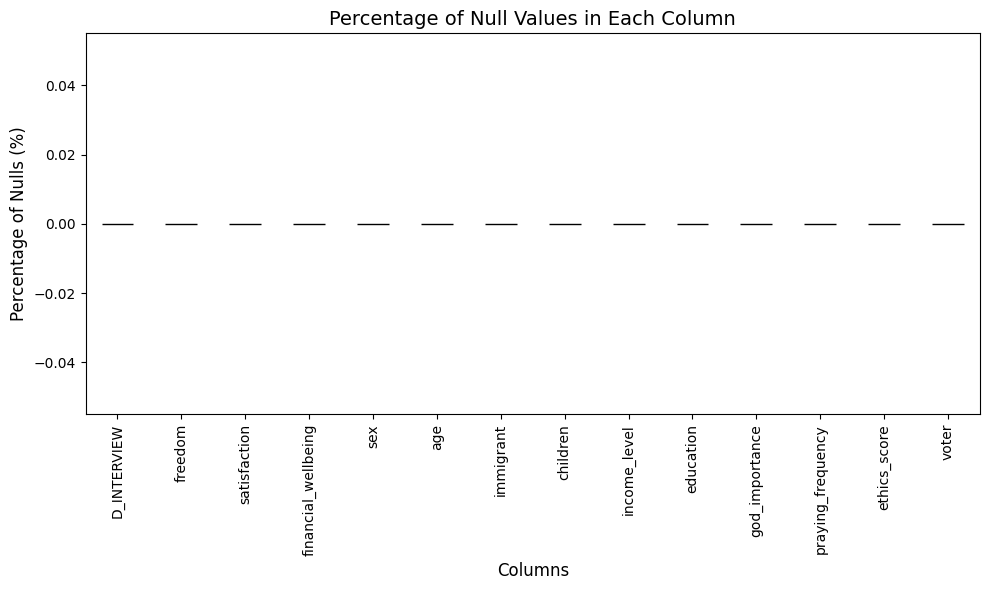

In [7]:
import matplotlib.pyplot as plt

# Calculate the percentage of null values for each column
null_percentages = countries.isna().mean() * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
null_percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Null Values in Each Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage of Nulls (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

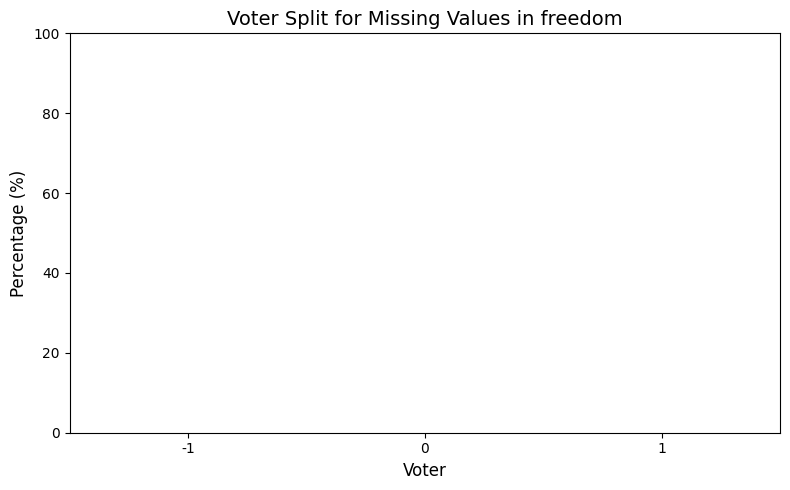

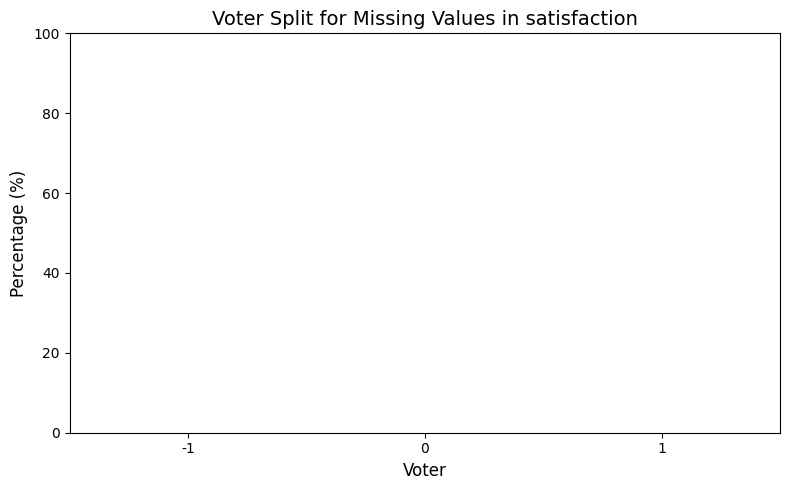

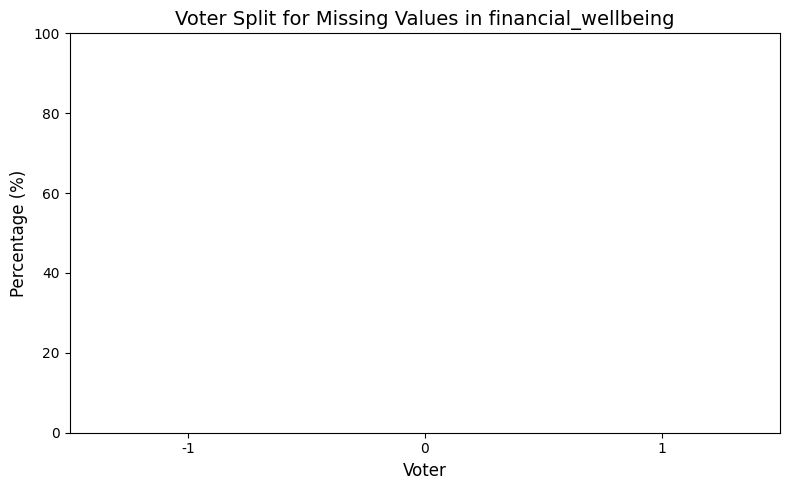

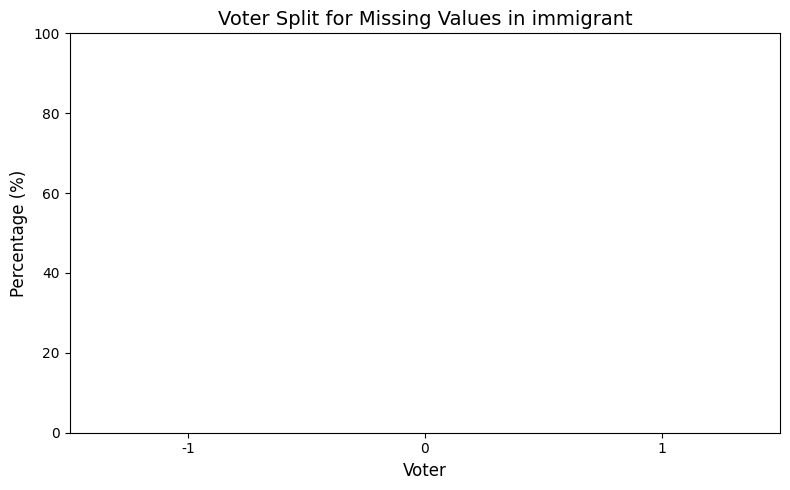

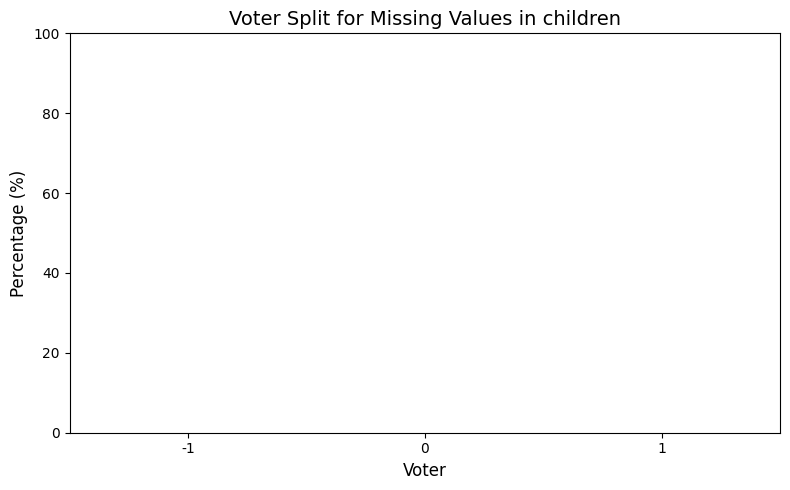

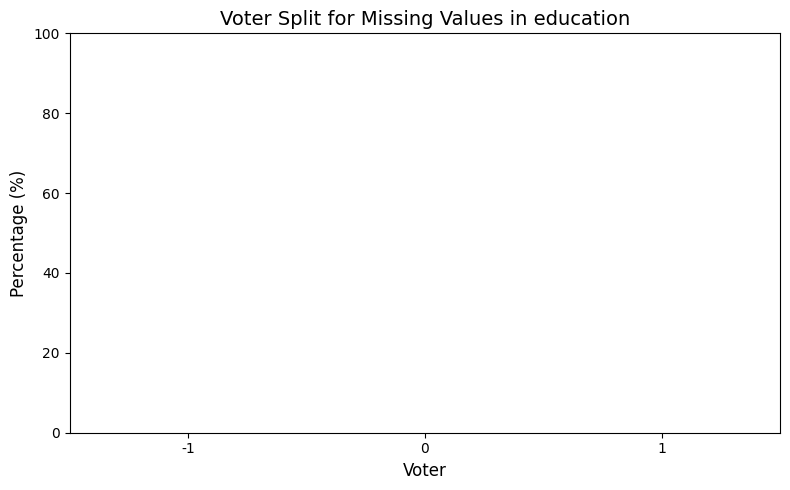

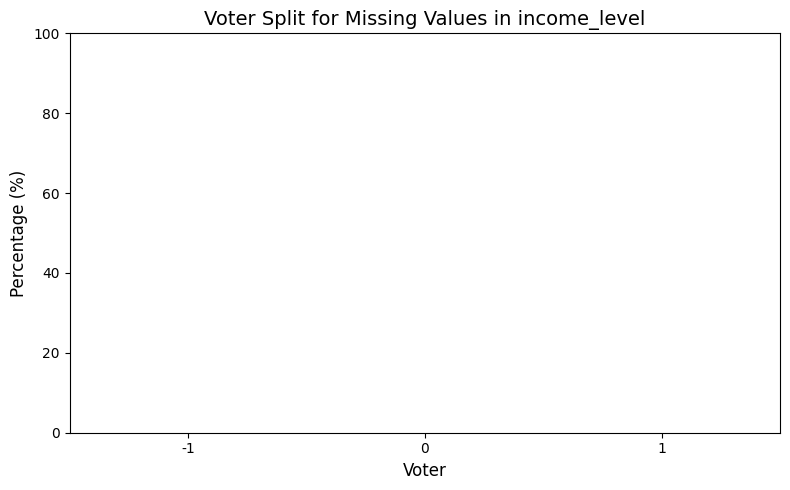

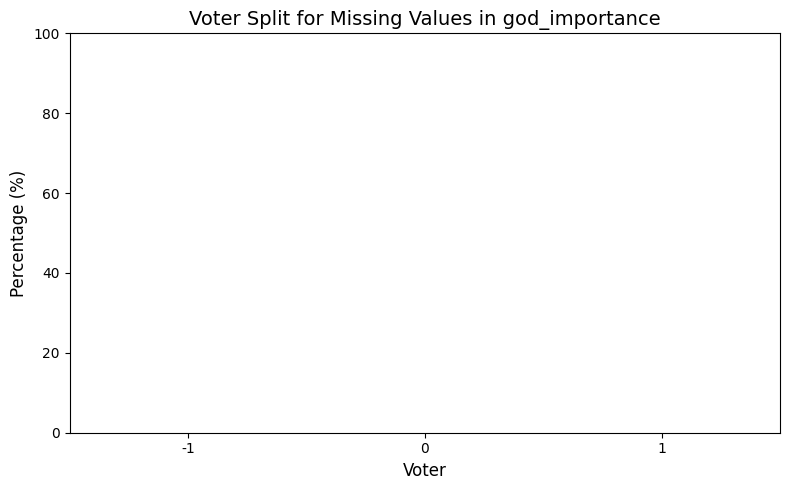

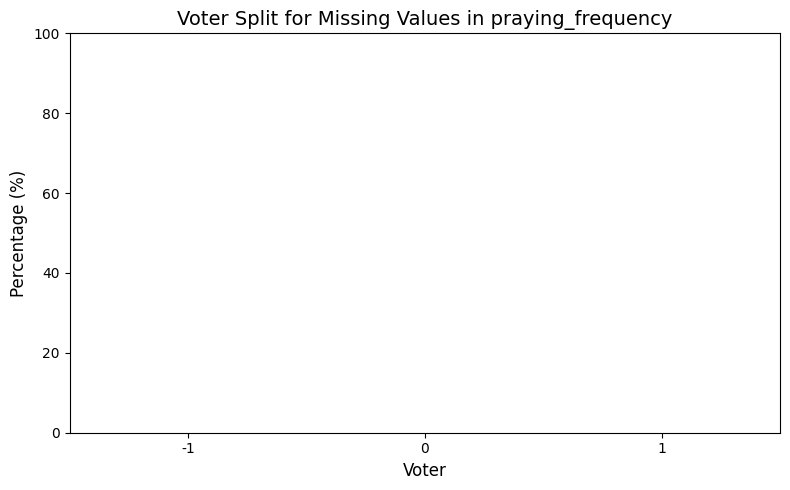

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to analyze for null-voter split
columns_to_check = [
    'freedom', 'satisfaction', 'financial_wellbeing', 'immigrant', 
    'children', 'education', 'income_level', 'god_importance', 
    'praying_frequency'
]

# Generate plots for each column
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    
    # Create a DataFrame of rows with missing values in the current column
    missing_data = countries[countries[col].isna()]
    
    # Count voter types in rows with missing values
    voter_counts = missing_data['voter'].value_counts(normalize=True) * 100
    
    # Create a bar plot
    sns.barplot(x=voter_counts.index, y=voter_counts.values, palette='viridis')
    plt.title(f'Voter Split for Missing Values in {col}', fontsize=14)
    plt.xlabel('Voter', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

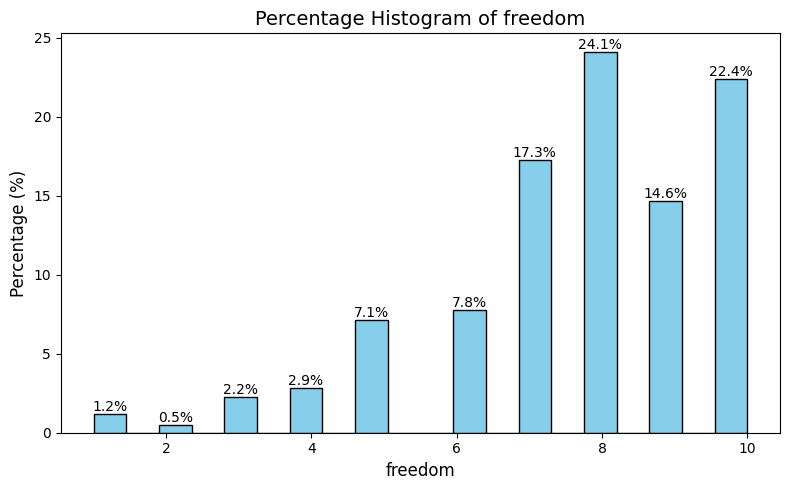

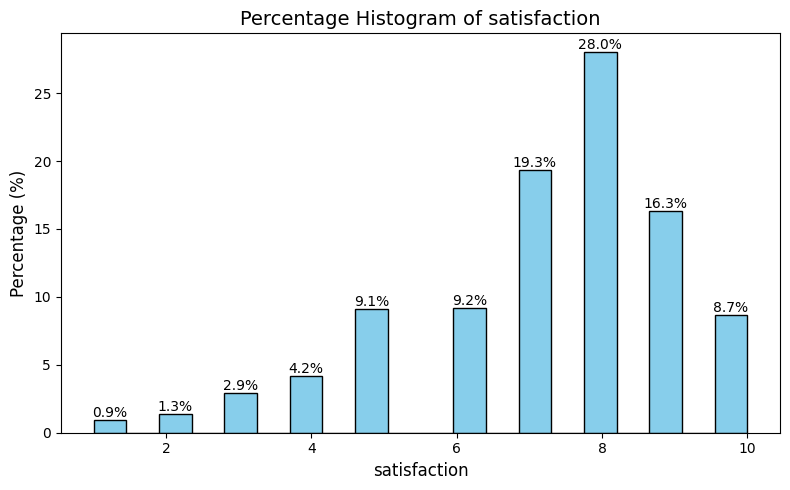

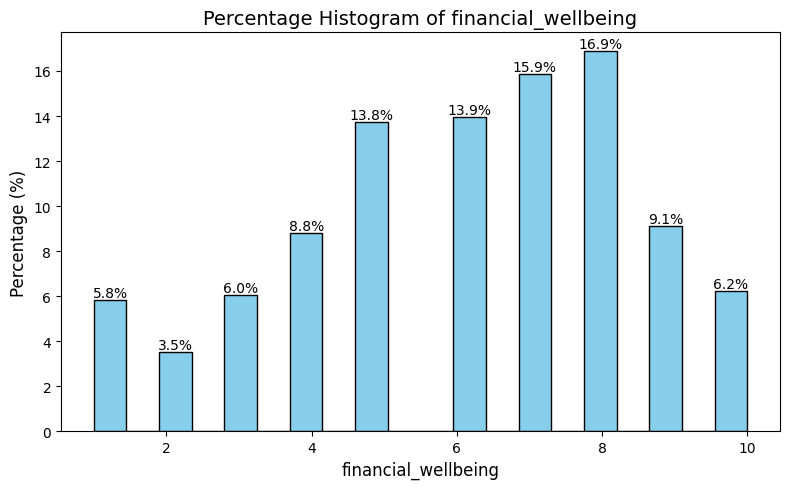

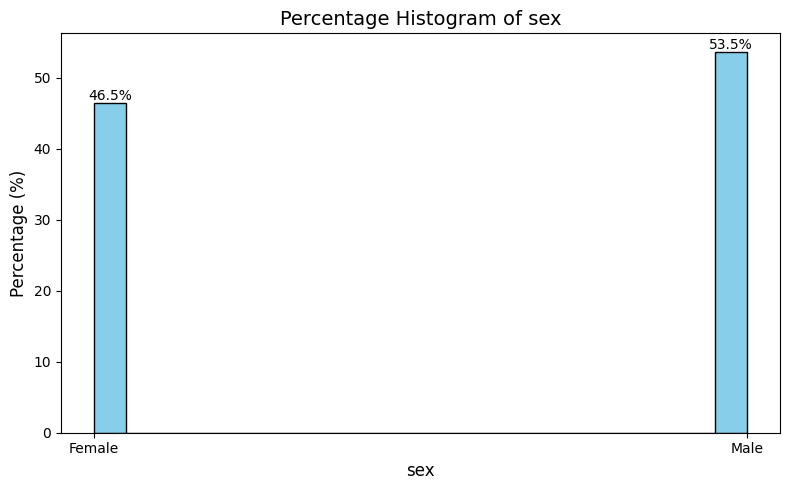

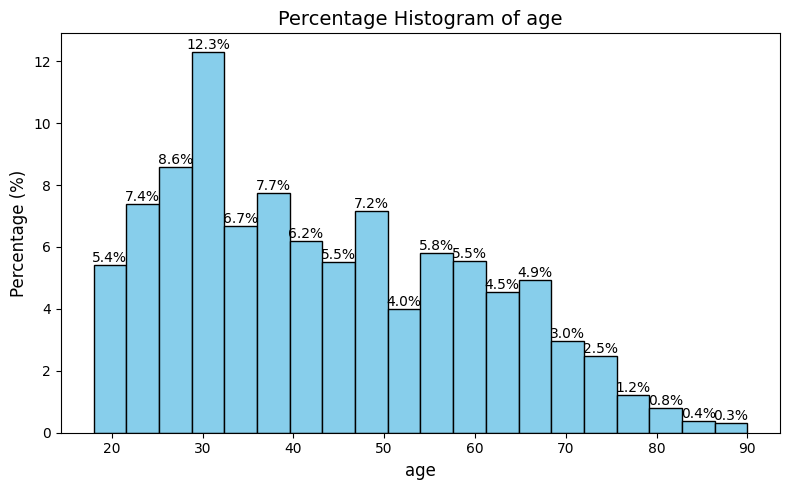

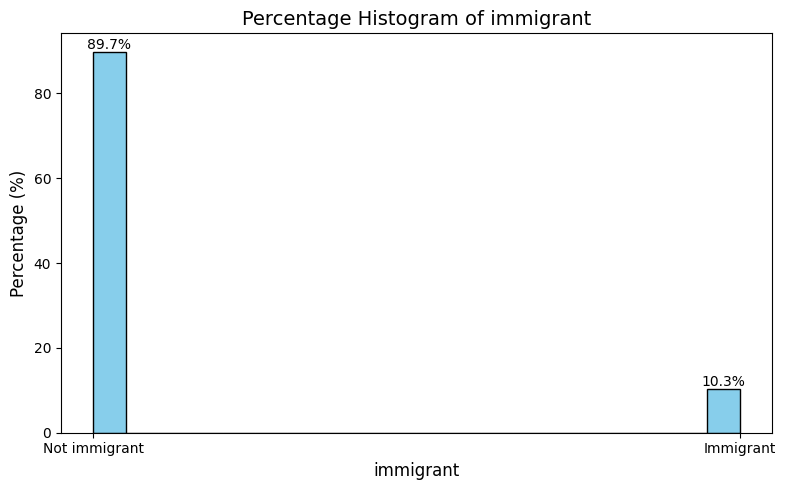

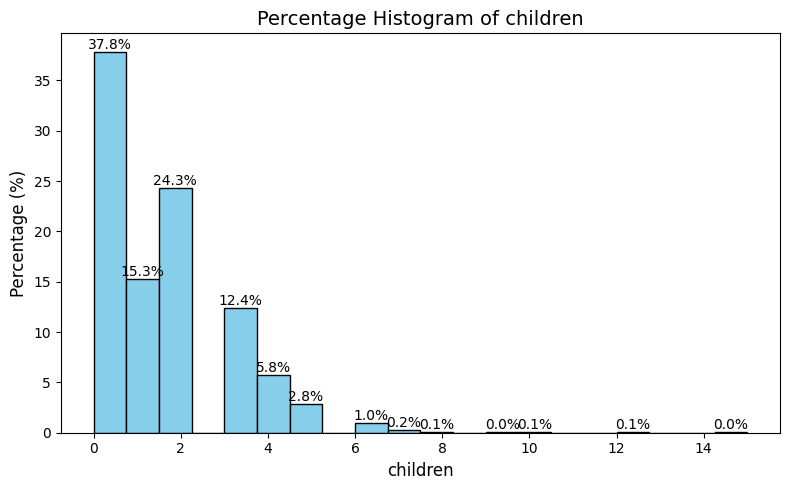

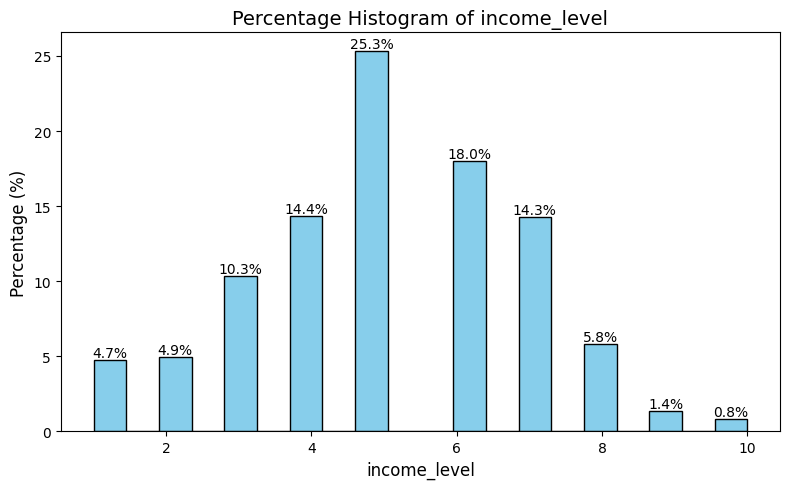

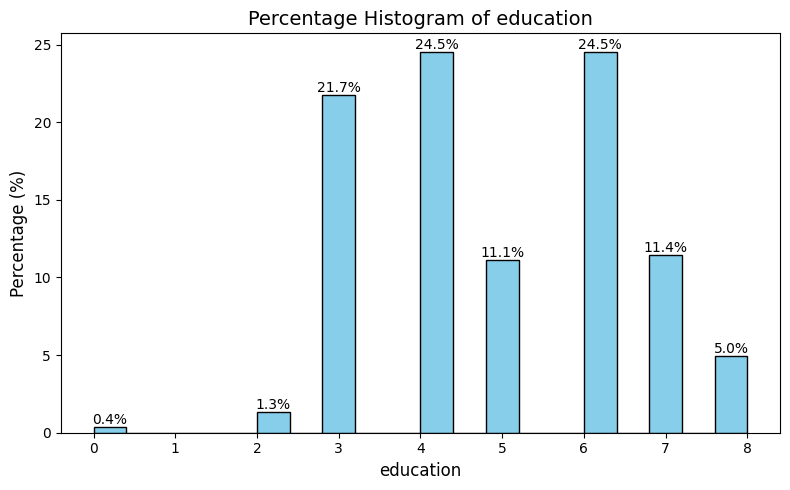

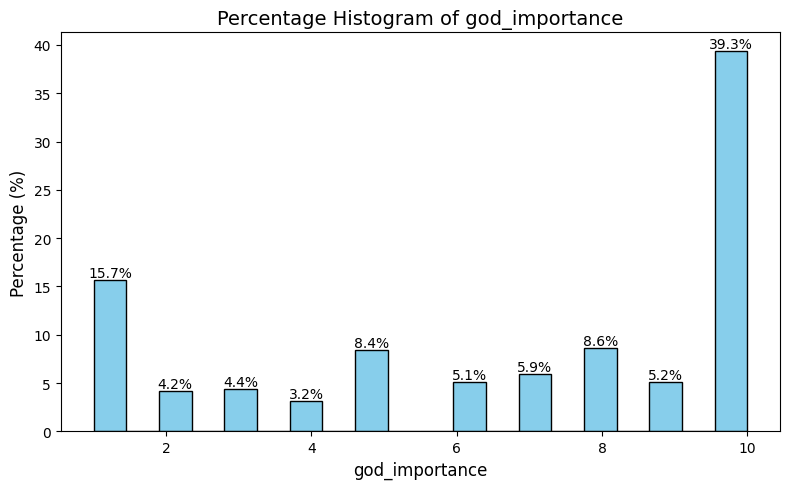

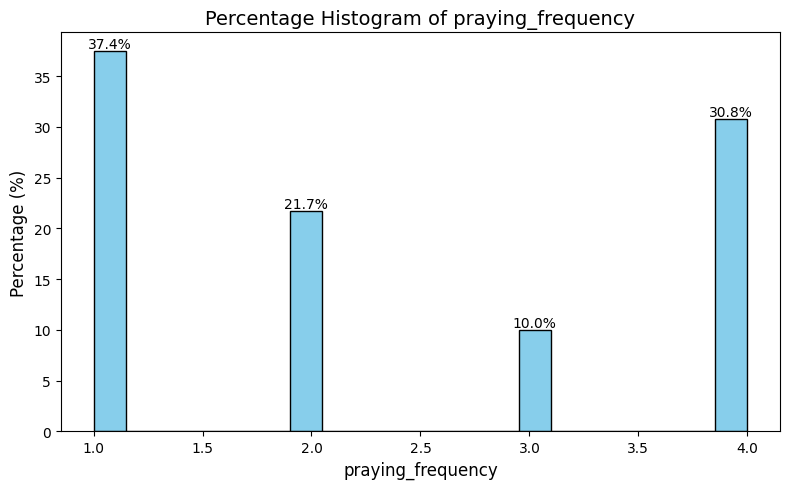

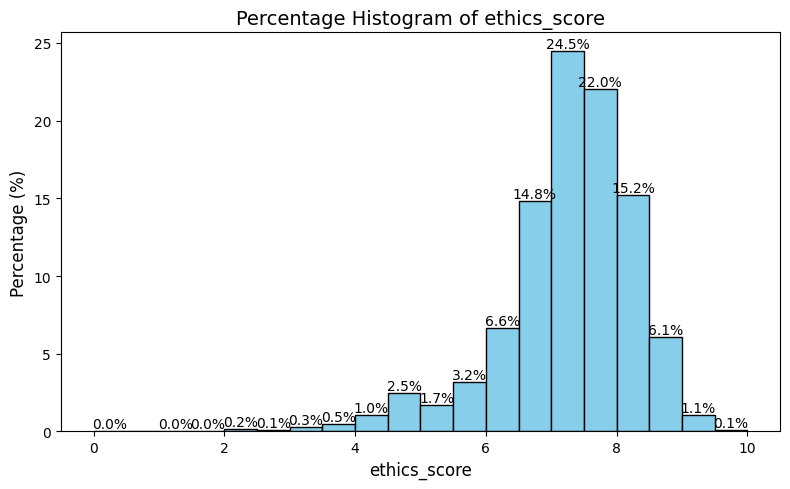

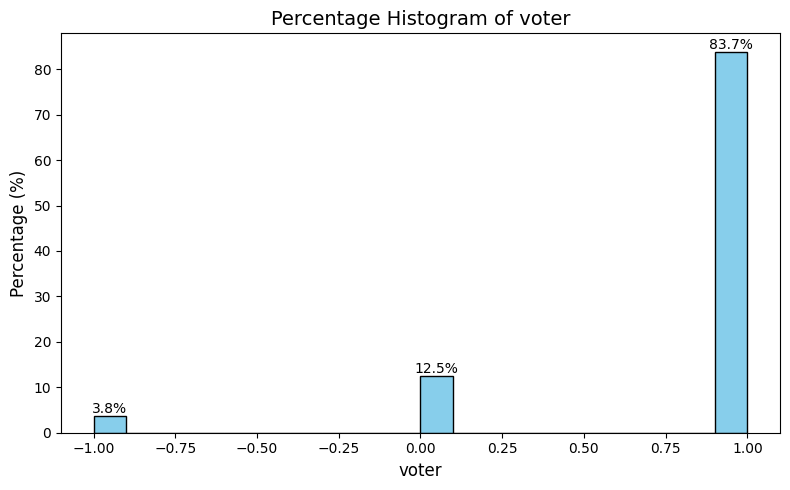

In [9]:
# Exclude 'D_INTERVIEW' and plot histograms for all other columns with percentages and data labels
columns_to_plot = [col for col in countries.columns if col != 'D_INTERVIEW']

# Plot histograms
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    
    # Prepare data and weights
    data = countries[col].dropna()
    weights = (np.ones_like(data) / len(data)) * 100  # Calculate weights for percentage
    
    # Plot the histogram
    counts, bins, patches = plt.hist(data, bins=20, color='skyblue', edgecolor='black', weights=weights)
    
    # Add data labels
    for count, patch in zip(counts, patches):
        if count > 0:  # Show label only for non-zero bins
            plt.text(patch.get_x() + patch.get_width() / 2, count, f'{count:.1f}%', 
                     ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title(f'Percentage Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.tight_layout()
    plt.show()

In [10]:
# Removing technical & redundant columns
# 'Q152','Q153','Q154','Q155','Q156','Q157',
# countries.drop(
#     columns=['version','doi','A_WAVE','A_STUDY','A_YEAR','B_COUNTRY', 'X003R', 'B_COUNTRY_ALPHA', 'C_COW_NUM','C_COW_ALPHA','Q_MODE','S007','N_REGION_ISO','N_TOWN','N_REGION_NUTS2','N_REG_NUTS1','J_INTDATE','FW_START','FW_END','K_TIME_START','K_TIME_END','G_TOWNSIZE','I_PSU','S_INTLANGUAGE','Q33','Q34','Q35','Partyname','O1_LONGITUDE','O2_LATITUDE'],
#     inplace = True
# )

# Removing columns with no distinct data
# distinct = pd.DataFrame({
#     'column_name': countries.columns,
#     'distinct_values': [countries[col].nunique() for col in countries.columns]
# })
# distinct = distinct[~(distinct['column_name'] == 'B_COUNTRY_ALPHA')]
# countries.drop(
#     columns = list(distinct[(distinct['distinct_values'] == 1) | (distinct['distinct_values'] == 0)]['column_name']),
#     inplace = True
# )

# Removing columns with only null values
# countries.drop(
#     columns = countries.columns[countries.isnull().all()].tolist(),
#     inplace = True
# )

# # Set threshold for columns with missing values
# missing_percentage_df = pd.DataFrame(countries.isnull().mean() * 100, columns=['Missing_Percentage']).reset_index()
# missing_percentage_df.rename(columns={'index': 'Column'}, inplace=True)
# missing_percentage_df = missing_percentage_df.sort_values(by='Missing_Percentage', ascending=False)

# countries.drop(columns = list(missing_percentage_df[missing_percentage_df['Missing_Percentage'] >= 10]['Column'].unique()), inplace=True)


# Replace missing values with NaN
# cols = list(set(countries.columns)-{'N_REGION_ISO','N_TOWN'})
# countries[cols] = countries[cols].replace([-1, -2, -3, -4, -5], np.nan)